#Classificação de músicas do Spotify 🎵.

## Sobre a base de dados:🎲


Este é um conjunto de dados de faixas do Spotify em uma variedade de 125 gêneros diferentes. Cada faixa possui alguns recursos de áudio associados a ela.

Uso da base: 🛠️
O conjunto de dados pode ser usado para:



1.   Construindo um sistema de recomendação com base em alguma entrada ou preferência do usuário
2.   Finalidades de classificação com base em recursos de áudio e gêneros disponíveis
3.   Qualquer outro aplicativo que você possa imaginar. Sinta-se à vontade para discutir!






## Objetivo do nosso projeto:🎯

Este notebook contempla a criação de um modelo preditivo para classificar músicas lentas e agitadas utilizando a base de dados "Spotify Tracks Dataset" do Kaggle.

O link desta base e mais detalhes se encontra em: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('/content/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.shape

(114000, 21)

##Criando a variável target🎯

De acordo com a regra de negócio, a coluna valence é uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada). Para criar a nossa coluna alvo do modelo preditivo, vamos utizar a coluna "valence" para ser nosso critério de músicas agitadas ou lentas.

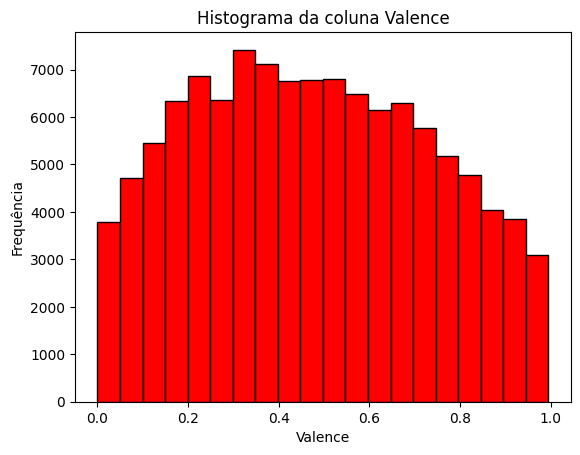

In [4]:
import matplotlib.pyplot as plt

#Analisando a colune "valence" com o intuito de criar a variável de target
plt.hist(df['valence'], bins=20, color='red', edgecolor='black')
plt.xlabel('Valence')
plt.ylabel('Frequência')
plt.title("Histograma da coluna Valence")
plt.show()

Uma análise superficial do gráfico demonstra que ele está levemente deslocado para a esquerda, o que pode sinalizar que a maioria das músicas tem um ritmo mais lento, mas a discussão ainda irá seguir adiante.

In [5]:
df['valence'].describe() #características da coluna

,valence
count,114000.000000
mean,0.474068
std,0.259261
min,0.000000
25%,0.260000
50%,0.464000
75%,0.683000
max,0.995000


Criando uma função para categorizar os diferentes tipos de música entre agitada e lenta a partir do limiar de valence.

In [6]:
def categorizar_valence(row):
  if row['valence'] > 0.5:
    return 'agitada'
  else:
    return 'lenta'
#Agora iremos criar a nova coluna de 'target' utilizando a função categorizar_Valence
df['target'] = df.apply(categorizar_valence, axis=1)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


In [7]:
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music,lenta
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music,lenta
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music,agitada
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music,lenta
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music,agitada


## Feature Engineering 🛠️

Como próximo passo, vamos armazenar em um novo dataframe apenas as colunas necessárias para nossa classificação de músicas.

In [8]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [9]:
df_musica = df.drop(['Unnamed: 0', 'track_id'], axis = 1)
df_musica.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


## Tratando os dados categóricos 🅰️

LabelEncoder: Essa classe é utilizada para codificar rótulos de classes em números inteiros. É frequentemente usado quando se trabalha com algoritmos de aprendizado supervisionado que requerem rótulos numéricos.

In [10]:
df_musica.head() #visualizando as colunas categóricas

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


In [11]:
def label_encoder_dataframe(df, columns_to_encode):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()

  for column in columns_to_encode:
    if column in df.columns:
      df[column] = le.fit_transform(df[column])
    else:
      print('A lista possui colunas que não existem no DataFrame.')
  return df

colunas_a_codificar = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
label_encoder_dataframe(df_musica, colunas_a_codificar)
df_musica.head() #o dataframe foi atualizado para ter apenas dados numéricos agora.

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


## Analisando as variáveis que vão compor nosso modelo 📊

Fazendo um gráfico de correlação com o seaborn.

In [12]:
import seaborn as sns

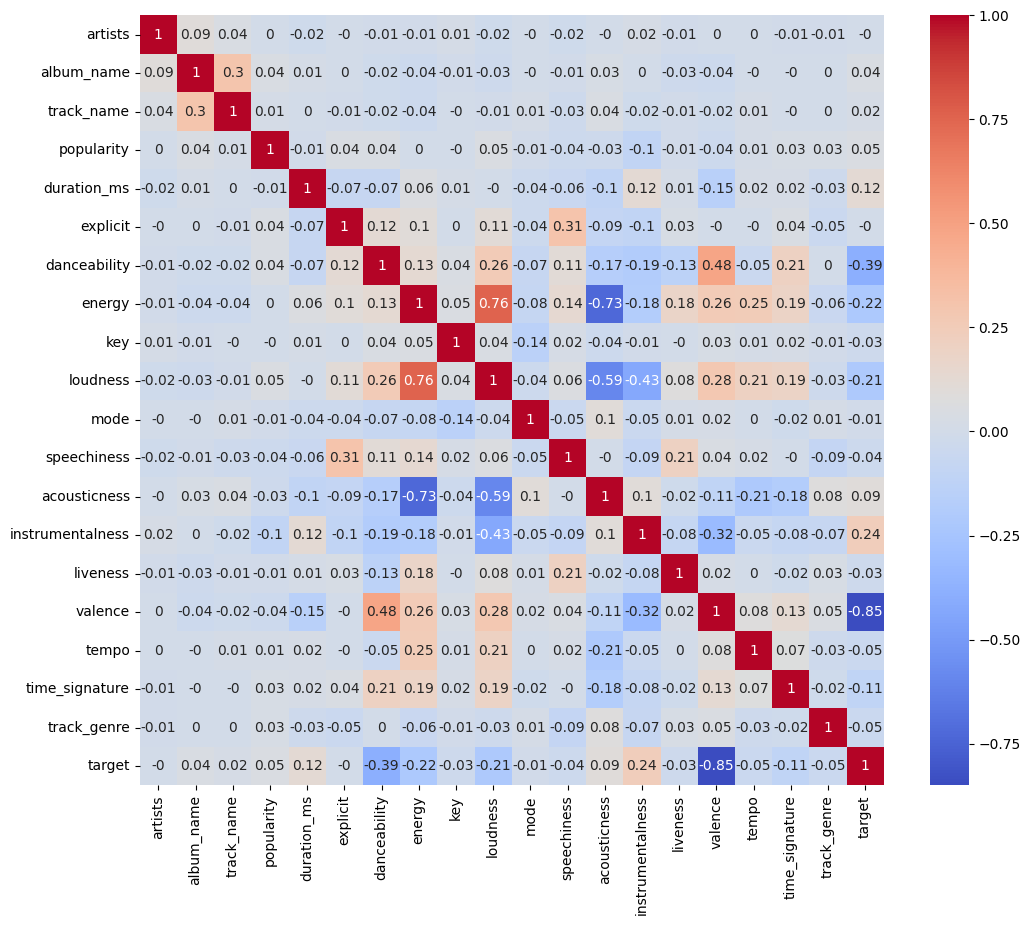

In [13]:
correlation_matrix = df_musica.corr().round(2)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', ax=ax);

Poucas variáveis tem uma alta correlação ao analisar o gráfico de calor, mas é sempre bom lembrar que correlação não é causalidade.

## Entendendo o equilíbrio da target 🎯

In [14]:
#Vamos verificar o equilíbrio das classes na target
round(df_musica['target'].value_counts(normalize=True)*100,2)

,proportion
target,
1,54.37
0,45.63


In [15]:
set(df['target'])

{'agitada', 'lenta'}

In [16]:
set(df_musica['target']) #apenas conferindo os valores que 0 e 1 representam: 0 = Agitada e 1 = Lenta

{0, 1}

Como as classes estão bem equilibradas não vai ser necessário realizar técnicas adicionais para tratar um possível desequilíbrio, como oversampling e outras.

## Separando os dados em treino e teste 🔄

Agora vamos criar um modelo supervisionado.

In [17]:
df_musica.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [18]:
#separando os dados em treino e teste (método hold out - divisão, treinamento e avaliação)
from sklearn.model_selection import train_test_split

X = df_musica[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = df_musica['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [19]:
print(X_train.shape, X_test.shape)

(91200, 9) (22800, 9)


## Normalizando os dados 📏

Ao aplicar o MinMaxScaler, todos os valores dos dados serão transformados para o intervalo entre 0 e 1, onde o valor mínimo será 0 e o valor máximo será 1. Essa técnica é especialmente útil quando os algoritmos de aprendizado de máquina são sensíveis à escala dos dados.

Por que aplicamos a normalização dos dados com as bases já separadas em treino e teste? 🤔 Se aplicarmos normalizações antes de dividir em conjuntos de treino e teste, podemos acabar introduzindo informações do conjunto de teste no conjunto de treino. Isso pode levar a uma avaliação otimista do desempenho do modelo, uma vez que o modelo terá visto parte dos dados de teste durante o treinamento. Este tipo de problema também é chamado de Data Leak (vazamento de dados).

In [20]:
from numpy import ScalarType
from sklearn.preprocessing import MinMaxScaler

#Criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train) #fazemos o fit apenas na base de treinamento para evitar data leak

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

## Criando uma função para executar modelos de machine learning 🚀

In [21]:
def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando modelo com os dados de treino
    modelo.fit(X_train_escalonado, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test_escalonado) # obter as probabilidades associadas às classes previstas para cada instância de dados
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test_escalonado)
    print("\nClassification Report")
    print(classification_report(y_test, predicao))

    print("\nRoc Curve\n")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})') # linewidth
    plt.plot([0, 1], [0, 1], color='gray',linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)


## Regressão logística

O modelo se baseia em uma função logística, que transforma as variáveis independentes em uma probabilidade entre 0 e 1. Para novas entradas de dados, o modelo calcula a probabilidade do evento binário ocorrer.

AUC 0.7949172507037146

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10403
           1       0.74      0.75      0.74     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


Roc Curve



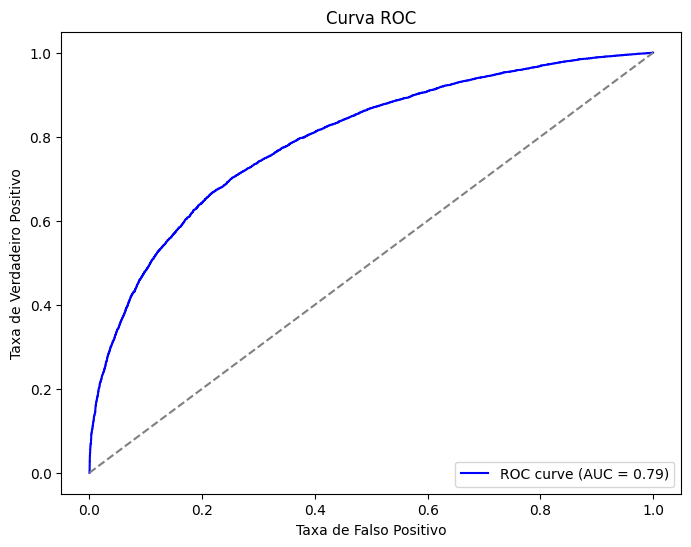

In [22]:

from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

Analisando o f1-score e as outras métricas de avaliação, é possível concluir que esse método de regressão não ficou bem adequado com a construção de um bom modelo com os dados selecionados.

## KNN (K-Nearest Neighbors)

Para um novo ponto de dados, o KNN identifica os K pontos mais próximos (vizinhos) no conjunto de treinamento. A classe do novo ponto é a classe mais frequente entre os K vizinhos.

AUC 0.8124733674942257

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     10403
           1       0.76      0.78      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



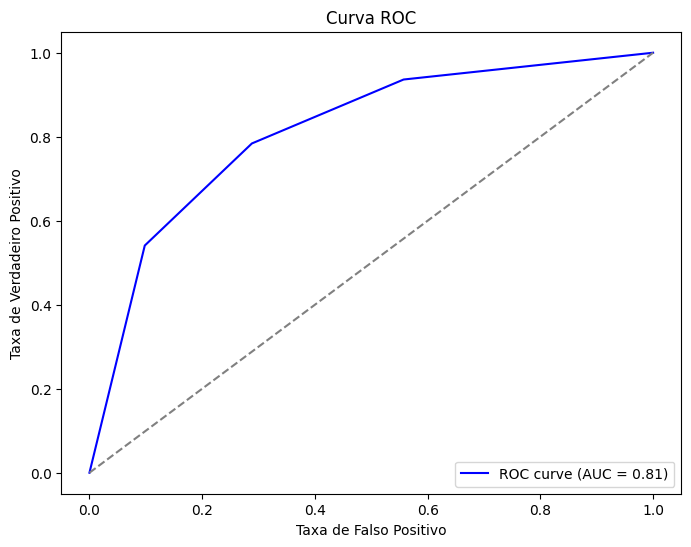

In [23]:

from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn)


Da mesma forma que o modelo de regressão, esse não ficou tão satisfatório.

## Random Florest

O Random Forest Classifier é um algoritmo de ensemble learning, que combina vários modelos para melhorar a performance. O modelo cria uma floresta de árvores de decisão, onde cada árvore é treinada em um subconjunto aleatório dos dados (bootstrap). A classe final do novo ponto de dados é a classe mais votada pelas árvores da floresta.

AUC 0.8267421370026148

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     10403
           1       0.76      0.77      0.76     12397

    accuracy                           0.74     22800
   macro avg       0.74      0.74      0.74     22800
weighted avg       0.74      0.74      0.74     22800


Roc Curve



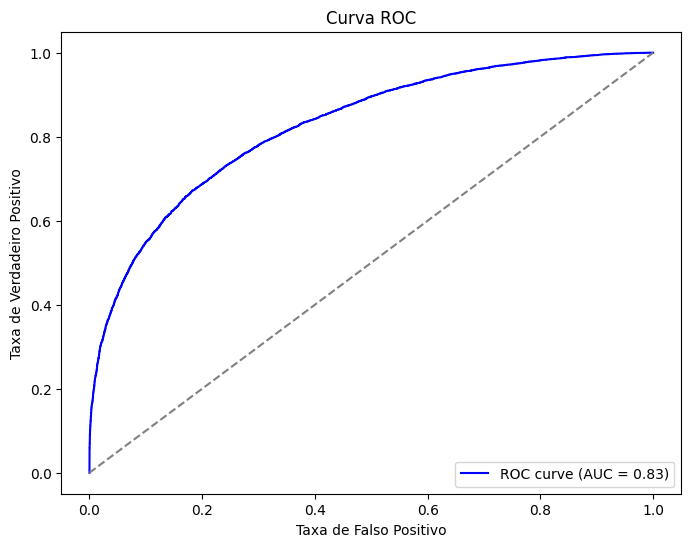

In [24]:

from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=7, n_estimators= 100)
roda_modelo(modelo_random_forest)

Está melhorando aos poucos, mas mesmo assim ainda não tem um rendimento ideal. Vamos utilizar Grid Search para alterar parâmetros.

## Testando novos parâmetros com Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV

# Defina os parâmetros a serem testados
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajuste o modelo ao conjunto de dados
grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiperparâmetros:", rf_params)

KeyboardInterrupt: 

Melhores Hiperparâmetros:{'max_depth':15, 'n_estimators':300}

Testando agora com esses parâmetros

AUC 0.9018050502942283

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10403
           1       0.83      0.84      0.83     12397

    accuracy                           0.82     22800
   macro avg       0.82      0.82      0.82     22800
weighted avg       0.82      0.82      0.82     22800


Roc Curve



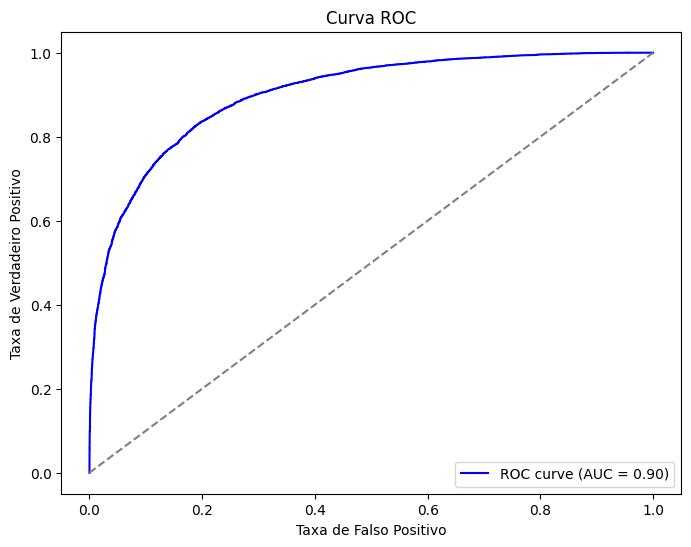

In [26]:
modelo_random_forest = RandomForestClassifier(max_depth=15, n_estimators= 300)
roda_modelo(modelo_random_forest)

AUC 0.9192428335622219

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     10403
           1       0.85      0.86      0.85     12397

    accuracy                           0.84     22800
   macro avg       0.84      0.84      0.84     22800
weighted avg       0.84      0.84      0.84     22800


Roc Curve



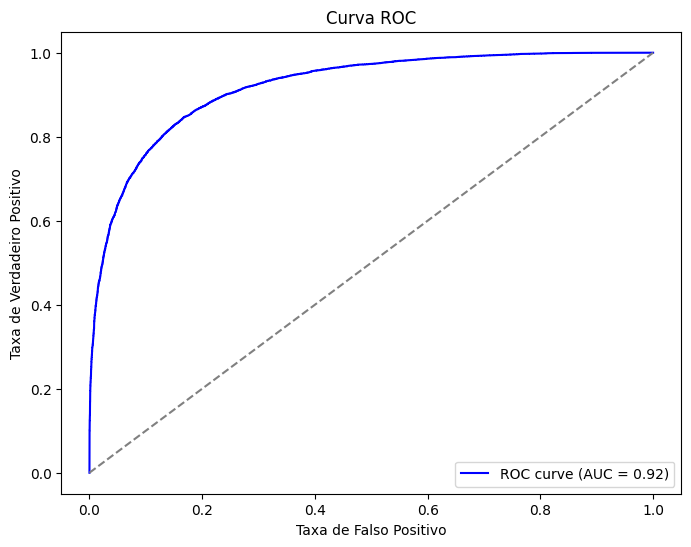

In [27]:
# Tentando novos parâmetros ajustados manualmente
modelo_random_forest_manual = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)
roda_modelo(modelo_random_forest_manual)

Neste exemplo, aumentamos o `n_estimators` (número de árvores) para 500, a `max_depth` (profundidade máxima das árvores) para 20 e adicionamos `min_samples_split=5`. Esses são apenas alguns ajustes que poderiam ser testados manualmente. O `random_state` foi adicionado para garantir a reprodutibilidade dos resultados.

Ainda não está próximo de uma acurácia de 90%, mas melhorou bastante. Provavelmente é melhor trabalhar com mais hiperparâmetros ainda para melhorar esse modelo.

## Testando o Modelo ✅

In [28]:
import numpy as np

novos_dados = pd.read_excel("novos_dados.xlsx")
base_original = pd.read_excel("novos_dados.xlsx")

#Criando a pipeline
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

# Realize a previsão usando o modelo Random Forest treinado
previsoes = modelo_random_forest_manual.predict(novos_dados)

# Obtendo o predict
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Música agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Música lenta


Com o modelo é possível ver o resultado a partir do track_genre em conjunto com o target, sendo possível visualizar se é uma música agitada ou lenta.